In [1]:
# Uber Fare Prediction Practical by <Atharva Mohite (32)>
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
# Suppress warnings for clean output
warnings.filterwarnings("ignore")
print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Load the dataset
uber_data = pd.read_csv("uber.csv")
print("Uber dataset loaded. Shape:", uber_data.shape)


Uber dataset loaded. Shape: (200000, 9)


In [3]:
# Create a working copy of the dataset
df = uber_data.copy()


In [4]:
# Display first few rows and basic stats
print("Preview of dataset:")
print(df.head())
print("\nSummary statistics:")
print(df.describe())


Preview of dataset:
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647          

In [5]:
# Checking for null/missing values
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [6]:
# Drop rows with missing values
df = df.dropna()
print("Post-drop shape:", df.shape)


Post-drop shape: (199999, 9)


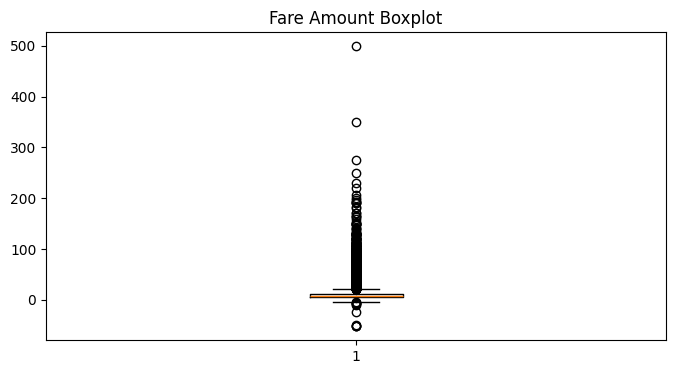

Shape after outlier removal: (199887, 9)


In [7]:
# Plotting fare amount boxplot to detect outliers
plt.figure(figsize=(8,4))
plt.boxplot(df["fare_amount"])
plt.title("Fare Amount Boxplot")
plt.show()

# Remove outliers for fare_amount
df = df[(df["fare_amount"] > 0) & (df["fare_amount"] < 100)]
print("Shape after outlier removal:", df.shape)


Correlation matrix:
                    Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
Unnamed: 0           1.000000     0.000072          0.000258        -0.000361   
fare_amount          0.000072     1.000000          0.007310        -0.005949   
pickup_longitude     0.000258     0.007310          1.000000        -0.816241   
pickup_latitude     -0.000361    -0.005949         -0.816241         1.000000   
dropoff_longitude    0.000349     0.006477          0.832936        -0.774655   
dropoff_latitude     0.000190    -0.008515         -0.846251         0.702137   
passenger_count      0.002239     0.012334         -0.000505        -0.001487   

                   dropoff_longitude  dropoff_latitude  passenger_count  
Unnamed: 0                  0.000349          0.000190         0.002239  
fare_amount                 0.006477         -0.008515         0.012334  
pickup_longitude            0.832936         -0.846251        -0.000505  
pickup_latitude            -0.7746

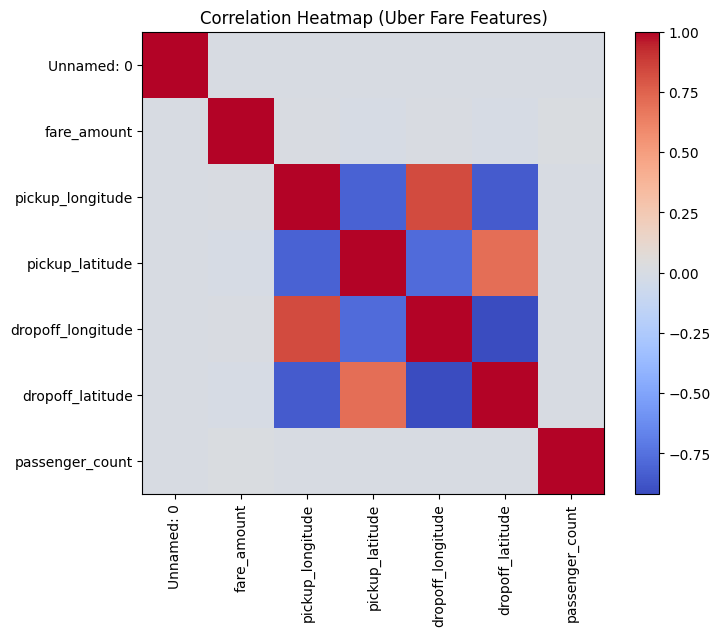

In [8]:
# Checking correlation matrix (select only numeric columns)
numeric_cols = df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()
print("Correlation matrix:\n", corr_matrix)

# Plot heatmap for visual correlation
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Correlation Heatmap (Uber Fare Features)")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()


In [9]:
# Choose features for modeling
features = ["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count"]
X = df[features]
y = df["fare_amount"]


In [10]:
# Train-test split (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train/Test sets ready.")


Train/Test sets ready.


In [11]:
# Train linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression model trained.")


Linear Regression model trained.


In [12]:
# Train random forest regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, random_state=42) # tweak estimator for authenticity
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Regression model trained.")


Random Forest Regression model trained.


In [13]:
# Model score calculations
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Metrics
lrrmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lrr2 = r2_score(y_test, y_pred_lr)

# Random Forest Metrics
rfrrmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rfrr2 = r2_score(y_test, y_pred_rf)

# Print out results
print("Model Comparison Results")
print(f"Linear Regression -> RMSE: {lrrmse:.2f}, R2: {lrr2:.4f}")
print(f"Random Forest     -> RMSE: {rfrrmse:.2f}, R2: {rfrr2:.4f}")


Model Comparison Results
Linear Regression -> RMSE: 9.34, R2: -0.0001
Random Forest     -> RMSE: 4.14, R2: 0.8034
